Understanding the Dataset

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('car data.csv')

In [40]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [41]:
df.shape

(301, 9)

In [42]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [43]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [44]:
df['Age'] = 2025 - df['Year']
df.drop('Year',axis=1,inplace = True)

In [45]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

EDA

In [46]:
df.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

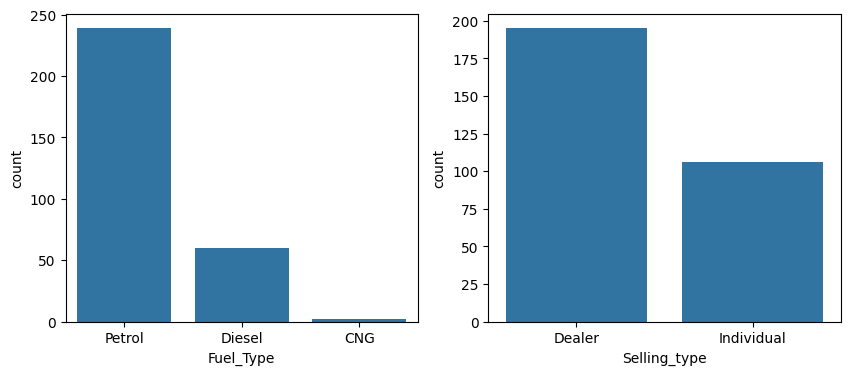

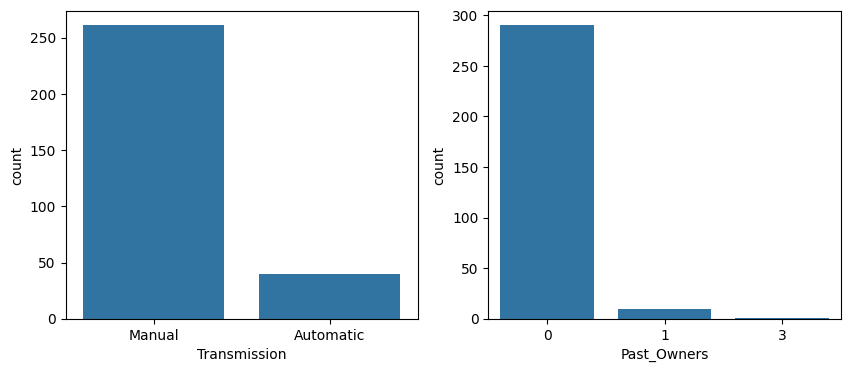

In [47]:
cat_cols = ['Fuel_Type','Selling_type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

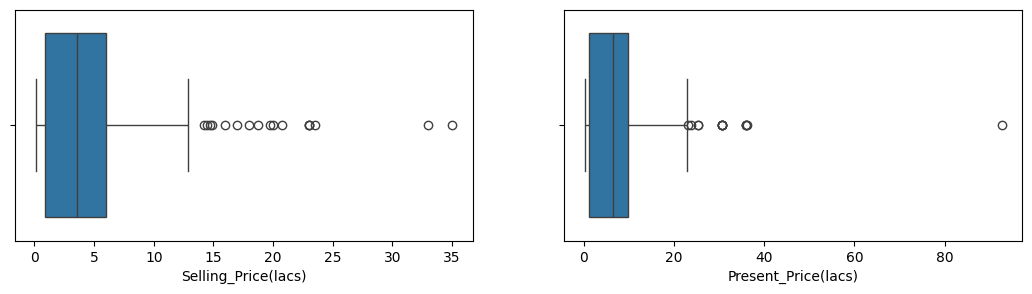

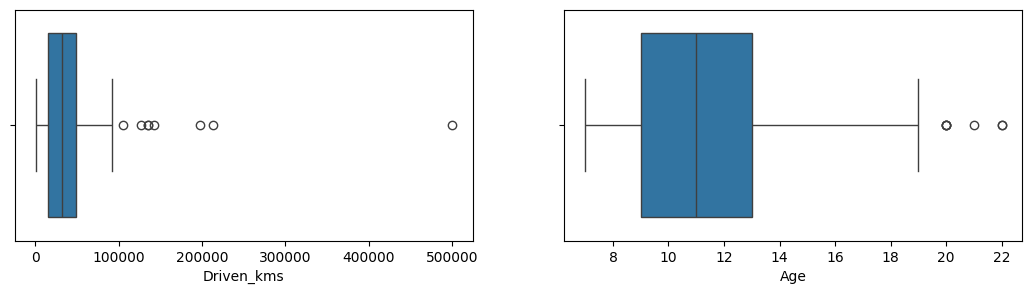

In [48]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Driven_kms','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

In [49]:
df[df['Present_Price(lacs)'] > df['Present_Price(lacs)'].quantile(0.99)]


,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [50]:
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]


,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,10
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [51]:
df[df['Driven_kms'] > df['Driven_kms'].quantile(0.99)]


,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,20
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,15
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,17


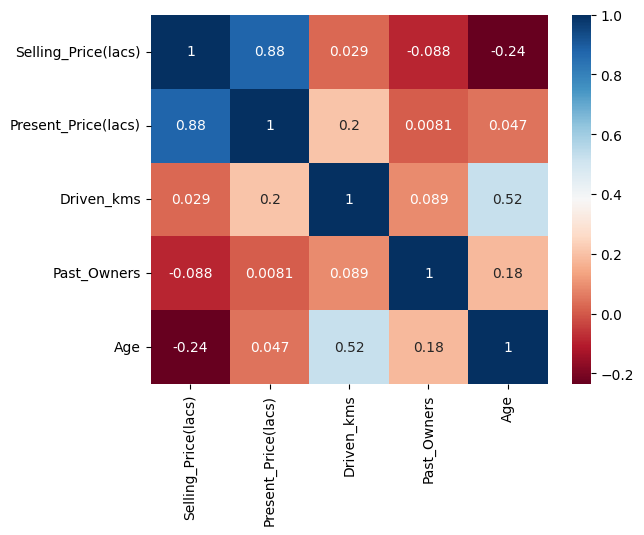

In [52]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdBu")
plt.show()

In [53]:
df.pivot_table(values='Selling_Price(lacs)', index = 'Selling_type', columns= 'Fuel_Type')


Fuel_Type,CNG,Diesel,Petrol
Selling_type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [54]:
df.pivot_table(values='Selling_Price(lacs)', index = 'Selling_type', columns= 'Transmission')


Transmission,Automatic,Manual
Selling_type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


Data Preparation

In [58]:

df.head()


,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Past_Owners,Age,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,Car_Name_Honda Karizma,Car_Name_Hyosung GT250R,Car_Name_KTM 390 Duke,Car_Name_KTM RC200,Car_Name_KTM RC390,Car_Name_Mahindra Mojo XT300,Car_Name_Royal Enfield Bullet 350,Car_Name_Royal Enfield Classic 350,Car_Name_Royal Enfield Classic 500,Car_Name_Royal Enfield Thunder 350,Car_Name_Royal Enfield Thunder 500,Car_Name_Suzuki Access 125,Car_Name_TVS Apache RTR 160,Car_Name_TVS Apache RTR 180,Car_Name_TVS Jupyter,Car_Name_TVS Sport,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
1,4.75,9.54,43000,0,12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True
2,7.25,9.85,6900,0,8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [59]:
df = pd.get_dummies(data = df,drop_first=True) 
df.head()


,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Past_Owners,Age,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,Car_Name_Honda Karizma,Car_Name_Hyosung GT250R,Car_Name_KTM 390 Duke,Car_Name_KTM RC200,Car_Name_KTM RC390,Car_Name_Mahindra Mojo XT300,Car_Name_Royal Enfield Bullet 350,Car_Name_Royal Enfield Classic 350,Car_Name_Royal Enfield Classic 500,Car_Name_Royal Enfield Thunder 350,Car_Name_Royal Enfield Thunder 500,Car_Name_Suzuki Access 125,Car_Name_TVS Apache RTR 160,Car_Name_TVS Apache RTR 180,Car_Name_TVS Jupyter,Car_Name_TVS Sport,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
1,4.75,9.54,43000,0,12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True
2,7.25,9.85,6900,0,8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

Train Test Split

In [60]:
# Separating target variable and its features
y = df['Selling_Price(lacs)']
X = df.drop('Selling_Price(lacs)',axis=1)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 105)
x test:  (61, 105)
y train:  (240,)
y test:  (61,)


Model Creation/Evaluation

Applying regression models:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression
5. Gradient Boosting Regression


In [63]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [64]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Linear Regression

Train R2-score : 0.94
Test R2-score : 0.52
Train CV scores : [ 0.06572713  0.74686916  0.60486341 -1.12031877  0.62993995]
Train CV mean : 0.19


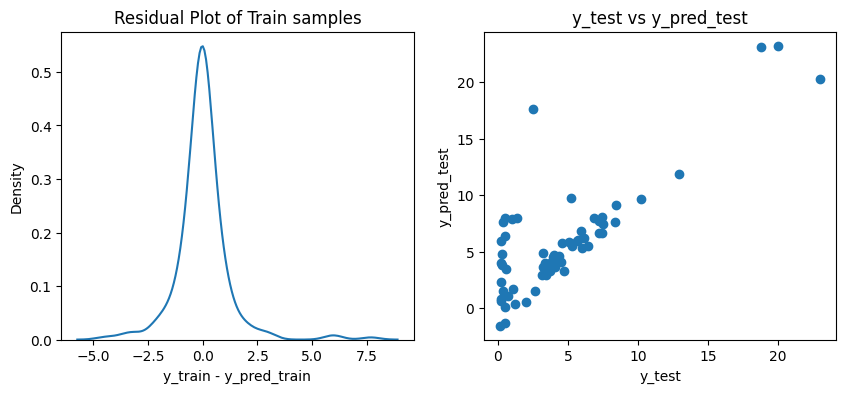

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Ridge

Train R2-score : 0.91
Test R2-score : 0.89
Train CV scores : [0.87984096 0.92559531 0.85813717 0.86109206 0.64679789]
Train CV mean : 0.83


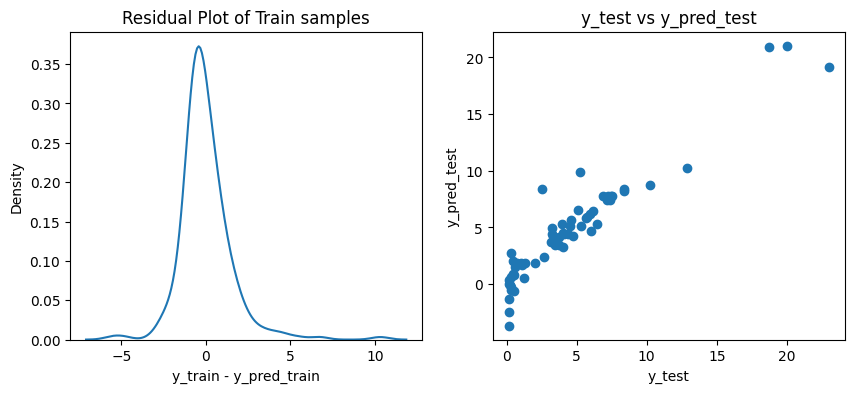

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

Lasso

Train R2-score : 0.9
Test R2-score : 0.9
Train CV scores : [0.86224942 0.89045619 0.87122177 0.84335551 0.58698477]
Train CV mean : 0.81


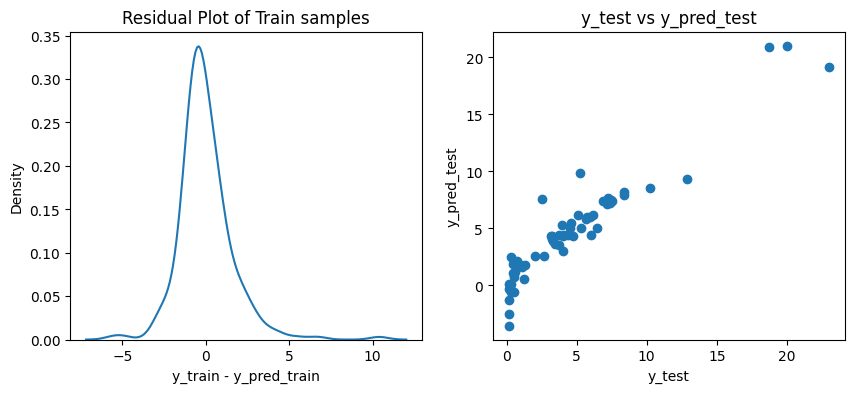

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

car_pred_model(ls_rs,"lasso.pkl")



Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.63
Test R2-score : 0.74
Train CV scores : [0.63511018 0.81441704 0.55814228 0.74500275 0.57082295]
Train CV mean : 0.66


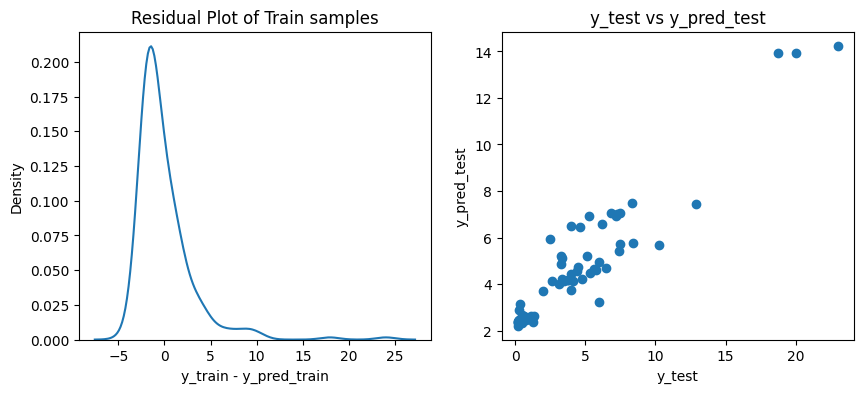

In [79]:
car_pred_model(rf_rs,'random_forest.pkl')


In [80]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=500)


Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.96
Train CV scores : [0.91064012 0.89790095 0.78616508 0.88939497 0.67605408]
Train CV mean : 0.83


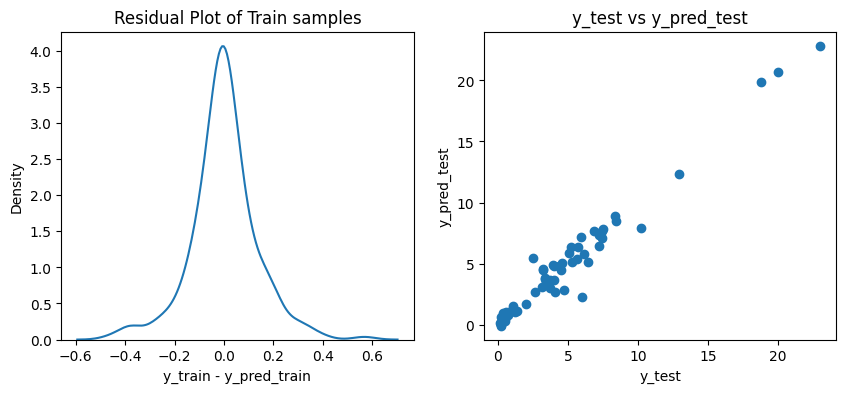

In [81]:
car_pred_model(gb_rs,"gradient_boosting.pkl")


In [82]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.94,0.52,0.19
1,Ridge,0.91,0.89,0.83
2,Lasso,0.90,0.90,0.81
3,RandomForestRegressor,0.63,0.74,0.66
4,GradientBoostingRegressor,1.00,0.96,0.83
